### Previsão de Preços de Casas com Técnicas Avançadas de Regressão

Este projeto utiliza o conjunto de dados da competição "House Prices - Advanced Regression Techniques" do Kaggle, que tem como objetivo prever os preços de venda de casas com base em diversas características.
Neste notebook, aplicaremos técnicas de engenharia de atributos (feature engineering), além de modelos de regressão avançados, como Random Forest e Gradient Boosting, para melhorar a precisão das previsões.
O desafio é perfeito para quem deseja praticar conceitos de machine learning e aprimorar habilidades com dados reais.

### IMPORTANDO O PANDAS
Importamos o pandas para ler e manipular os dados em formato de tabela (DataFrame).

In [2]:
import pandas as pd

### CARREGANDO O ARQUIVO CSV
Carregamos o arquivo CSV com os dados de treino e salvamos em um DataFrame chamado "base"

In [3]:
base = pd.read_csv('train.csv')

In [4]:
#visualizando a base
base.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#retornando o shape da base (mostrará o numero de linhas e colunas)
base.shape

(1460, 81)

In [6]:
# carregando o conteúdo da base 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### VERIFICANDO A QTD DE VALORES NULOS
Usamos o .isnull().sum() para contar quantos valores faltam em cada coluna do DataFrame. Em seguida, usamos .sort_values(ascending=False) para ordenar da coluna com mais valores ausentes até a com menos. Por fim, o .head(10) exibe só as 10 primeiras colunas dessa ordenação, ou seja, as 10 com mais dados faltando

In [7]:
base.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

### ELIMINANDO COLUNAS COM VALORES NULOS
crio a variável "eliminar", somo os nulos com .isnull().sum() e divido pelo número de linhas de cada coluna com  /base.shape[0]. Mas só será armazenado na variável eliminar as colunas cujo o resultado desta operação seja maior que 10%. Isso constitui a etapa de tratamento de dados e é muito importante porque evita ruídos no nosso modelo.

Em outras palavras, ter muitos dados vazios significa que nosso modelo teria que "chutar" muito o que diminuiria a precisão

In [8]:
# Criando a variável
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
# Eliminando essas colunas
base = base.drop(eliminar, axis=1)

### ELIMINANDO DADOS TIPO TEXTO
O modelo não entende texto puro. Caso fosse necessário manter essas informações, poderíamos aplicar técnicas como One-Hot Encoding. Mas, como não é o caso neste projeto, vamos eliminar todas as colunas do tipo texto (object) da base.

In [10]:
#selecionando apenas as colunas numéricas
colunas = base.columns[base.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
# Criando uma nova base com essas colunas somente numéricas
base2 = base.loc[:, colunas]
base2.head(3)

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  

[3 rows x 37 columns]

In [17]:
# Verificando novamente os valores nulos restantes
base2.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     81
MasVnrArea       8
LotArea          0
MSSubClass       0
Id               0
OverallCond      0
OverallQual      0
YearRemodAdd     0
YearBuilt        0
BsmtFinSF2       0
dtype: int64

In [ ]:
#substituindo os valores vazios por -1 para indicar ao modelo a ausencia desses valores
base2 = base2.fillna(-1)

### SELECIONANDO X e Y
Agora, excluímos a coluna SalesPrice para ser o vetor de respostas corretas que o modelo tentará prever durante o treino.

In [13]:
#selecionando x e y
X = base2.drop('SalePrice',axis=1)
y = base2.SalePrice

In [14]:
#Importando o train_test_split
from sklearn.model_selection import train_test_split


### SEPARANDO A BASE EM TREINO E TESTE
* X_train: subconjunto de features (variáveis independentes) que o modelo utilizará para aprender.
* y_train: valores reais da variável alvo (respostas corretas) correspondentes ao X_train.
* X_test: subconjunto de features reservado para teste, que o modelo ainda não viu.
* y_test: valores reais da variável alvo correspondentes ao X_test, usados para avaliar o desempenho do modelo.

* Além disso, separamos o conjunto de dados em treino e teste.
Determinamos qual porcentagem será usada para cada conjunto (test_size=0.33 significa 33% para teste e 67% para treino) e também definimos um valor fixo de aleatoriedade (random_state=42) para que a divisão dos dados seja sempre a mesma em cada execução, garantindo reprodutibilidade.

In [1]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined

In [16]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [17]:
#Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

# y = β0 + β1​x1 + β2x2 + β3x3 ... βnxn + e
# O modelo tenta aprender os betas (coeficientes) que melhor aproximam o y_train (y da fórmula ) com base no X_train 
# que são as variáveis independentes/de entrada (x da fórmula)

In [ ]:
#Para fins de conhecimento somente, aqui conseguimos ver os coeficientes (pesos) de 
# cada variável no modelo de regressão linear
for nome, coef in zip(X_train.columns, reg_rl.coef_):
    print(f"{nome}: {coef}")                                           

Id: -2.588619900302906
MSSubClass: -182.55047934162442
LotArea: 0.4267079595749405
OverallQual: 18064.732624963777
OverallCond: 3471.284712188987
YearBuilt: 301.2172682959538
YearRemodAdd: 168.17442484396864
MasVnrArea: 23.059596019975643
BsmtFinSF1: 6.575322565605835
BsmtFinSF2: -2.283242902183995
BsmtUnfSF: -1.7465602326975345
TotalBsmtSF: 2.5455194293977335
1stFlrSF: 4.4392947496079245
2ndFlrSF: 2.4882105013620546
LowQualFinSF: 23.719248211672802
GrLivArea: 30.646753461081552
BsmtFullBath: 11800.863603821048
BsmtHalfBath: -65.27807160093916
FullBath: 5446.019493306194
HalfBath: 97.95991057200675
BedroomAbvGr: -9942.614672921258
KitchenAbvGr: -14564.538449463409
TotRmsAbvGrd: 6969.79116291284
Fireplaces: 5046.053704259015
GarageYrBlt: -13.190285103648492
GarageCars: 17054.20250207203
GarageArea: 6.936851197643908
WoodDeckSF: 28.99796185228427
OpenPorchSF: -14.408977144767848
EnclosedPorch: 16.26944597287319
3SsnPorch: 48.652002752112075
ScreenPorch: 91.11986855311997
PoolArea: -156.7

In [19]:
#fazendo a previsão para os dados de teste
y_rl = reg_rl.predict(X_test)

In [20]:
#importando a árvore de regressão 
from sklearn import tree        

In [21]:
# Criando o regressor e fazendo o fit com os dados de treino 
re_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [22]:
#fazendo a previsão 
y_ar = re_ar.predict(X_test)

In [23]:
#Importando KNN 
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [25]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

In [26]:
#Importando o erro médio absoluto  
from sklearn.metrics import mean_absolute_error

In [27]:
#importando o erro médio quadrático 
from sklearn.metrics import mean_squared_error

### Avaliação do modelo de regressão Linear:
As métricas mean_absolute_error (MAE) e mean_squared_error (MSE) comparam os valores previstos pelo modelo (y_pred) com os valores reais da base (y_test).

* MAE: média das diferenças absolutas entre previsão e valor real (erro médio em unidades da variável).

* MSE: média dos quadrados das diferenças, penalizando mais erros grandes.
Quanto menores esses valores, melhor o desempenho do modelo.

In [28]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test,y_rl))
print(mean_squared_error(y_test,y_rl))

23763.187393064778
1533982883.4448779


### Avaliação do modelo de Arvore de Regressão
Após testar com Regressão Linear, utilizei Árvores de Decisão para capturar relações não lineares e interações entre variáveis que o modelo linear não conseguiu representar adequadamente, buscando melhorar a performance das previsões

In [29]:
# da árvore de decisão
print(mean_absolute_error(y_test,y_ar))
print(mean_squared_error(y_test,y_ar))

27580.78838174274
2530245114.701245


In [30]:
# e do knn
print(mean_absolute_error(y_test,y_knn))
print(mean_squared_error(y_test,y_knn))

33273.08298755187
2733937586.841286


In [31]:
# Importando o matplotlib
import matplotlib.pyplot as plt

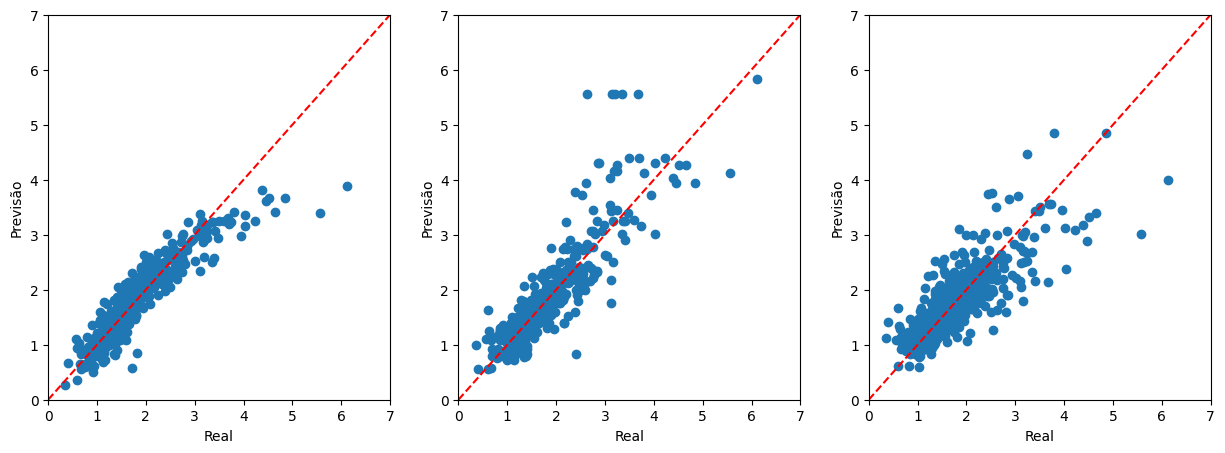

In [32]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

In [33]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [34]:
# Visualizando a base
teste.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [35]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar,axis=1)

In [36]:
# Verificando as colunas numéricas
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [37]:
# Mantendo também apenas as colunas numéricas
teste = teste.loc[:,colunas2]

In [38]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [39]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
GarageCars       1
GarageArea       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFinSF1       1
dtype: int64

In [40]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)

In [41]:
# Vamos usar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [42]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [43]:
# E extrair somente o Id e o SalePrice
resultado = teste[['Id','SalePrice']]
resultado.head(3)

Id      SalePrice
0  1461  122234.995960
1  1462  139178.263684
2  1463  169872.054251

In [ ]:
# base para ser exportada
print(resultado.shape)
print(resultado.info())
resultado.to_csv('resultado.csv',index=False)